# $k$-Means on a Synthetic Dataset

<div class="alert alert-block alert-success">
<b>Goals:</b> 

* Demonstrate $k$-means clusterings.
* Application of artificial data.
* Focus on technical aspects rather than results and interpretation.
</div>


<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we test different k-clusterings on a synthetic dataset.
</div>


__Goals__
* run different versions of k-Means on a synthetic dataset
* analyze outcome and performance with different parametrizations

__Attribution__
* Experiments are based on the [k-means demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html) by author: Author: Phil Roth <mr.phil.roth@gmail.com> under License BSD 3 clause
* Parts of the code have been modified and extended to fit the context of the lecture

In [ ]:
# Original Licence Remark (k-Means)
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

## Create a Synthetic Dataset

In [69]:
import time   # measure the run time of k-Means
import numpy as np # handle arrays/vectors
import matplotlib.pyplot as plt # plot

from sklearn.datasets import make_blobs  # create an artificial dataset
from sklearn.cluster import KMeans  # k-Means
from sklearn.cluster import MiniBatchKMeans # A sometimes faster version of k-Means

In [70]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, center_box=(-5.0, 5.0))

In [71]:
X

array([[-2.90341787,  0.59748843],
       [-3.45760043,  0.37424622],
       [-6.37135255, -4.82214055],
       ...,
       [ 0.39167538, -1.16005993],
       [-1.32351827,  0.45967357],
       [ 0.91639536, -0.25115621]])

In [72]:
X.shape

(1500, 2)

In [73]:
y.shape

(1500,)

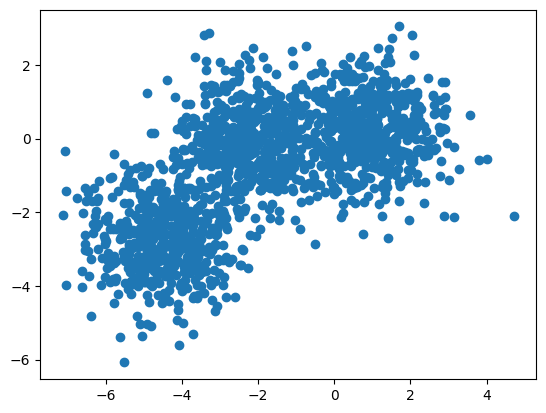

In [74]:
plt.scatter(X[:,0], X[:,1])

## Run k-Means++

In [75]:
kmeans_pp = KMeans(
    n_clusters=3, # find 3 clusters
    random_state=random_state, # make experiments replicable
    n_init=20, # find the best clustering out of 20 tries with different initialization
    init='k-means++', # use k-means++ initialization
    max_iter=300, tol=0.0001) ## abort after 300 iterations or if the cost function does not change more than tol

While we run the algorithm, we will also measure the runtime.

In [76]:
time.time()

1729014092.1966383

In [77]:
time.time()/60/60/24/365 # time.time() returns the seconds passed since 01.01.1970 0:00:00 (epoch time)

54.826677214759826

<div class="alert alert-block alert-info">
<b>Technical Remark:</b> Time can be measured using the time module. Time is always measured in reference to 01.01.1970.
    
Keep in mind: measuring runtimes is difficult due to
* the multiple processes running in (pseudo-)parallel on a computer
* the influence of the datasets properties
* the influence of random in the algorithm

Remedies:
* run on isolated machines (to the extent that isolation is possible)
* count time over multiple runs (e.g. using different random-seeds)
* count time over different datasets (e.g. created using different random-seeds)
* repeat the exact same experiment (same parameter, same data) and use the __lowest__ time
</div>

In [78]:
start_time=time.time()
cluster_assignments=kmeans_pp.fit_predict(X)
print(time.time()-start_time)

0.1984717845916748


In [79]:
def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

In [80]:
k_means_report(kmeans_pp)

k-means 
 * has seen 2 features,
 * used 6 iterations, and 
 * resulted in an inertia of 2646.961150684696.


<div class="alert alert-block alert-info">
<b>Technical Remark:</b> Is the resulting inertia high or low? - Inertia is only useful for comparing two clusterings on the same data using the same number of clusters!
</div>

## Inspect the Resulting Clustering

In [81]:
kmeans_pp.cluster_centers_

array([[-4.5252317 , -2.77316921],
       [ 0.96346817,  0.1769168 ],
       [-2.29218231, -0.06091102]])

In [82]:
cluster_assignments

array([2, 2, 0, ..., 1, 2, 1])

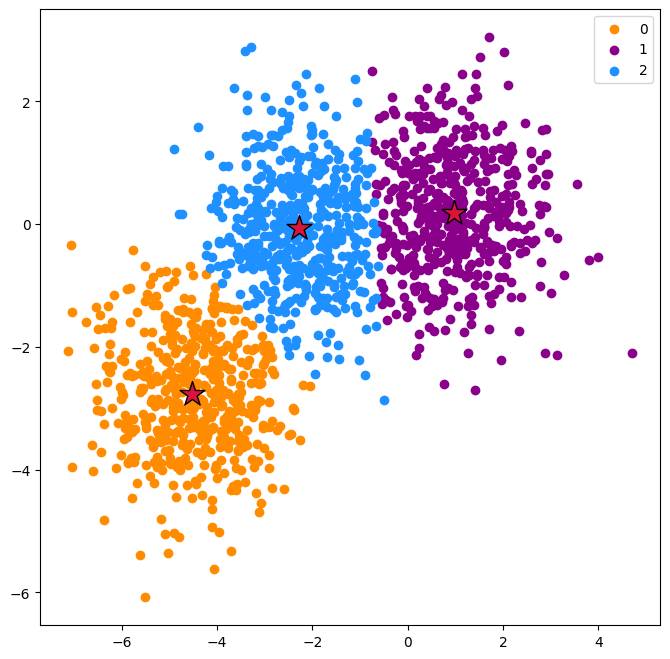

In [83]:

colors=['darkorange', 'darkmagenta', 'dodgerblue']

def print_clustering(X, kmeans, cluster_assignments):
    plt.figure(figsize=(8, 8))

#    for i in range(0,len(np.unique(cluster_assignments))):
    for i in np.unique(cluster_assignments):
        X_sub=X[cluster_assignments==i, :]
        plt.scatter(X_sub[:, 0], X_sub[:, 1], c=colors[i], label=i)
    
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
    )

    plt.legend()
    
print_clustering(X, kmeans_pp, cluster_assignments)

## Interpretation
* k-means was used to create 3 clusters
* the three clusters can be visualized (after all our data has only two features)
* the three clusters appear as compact shapes around their centers
* we do not see a clear separation between the clusters

## Evaluation
In the rare case where we already know a valid grouping of the data, we can check wether a clustering algorithm -- unaware of that grouping -- would retrieve the same groups.

Note: This is by definition not an exploratory task. However, it is a way to test clustering algorithms on known data to determine whether they are suitable for exploration of unknown data.

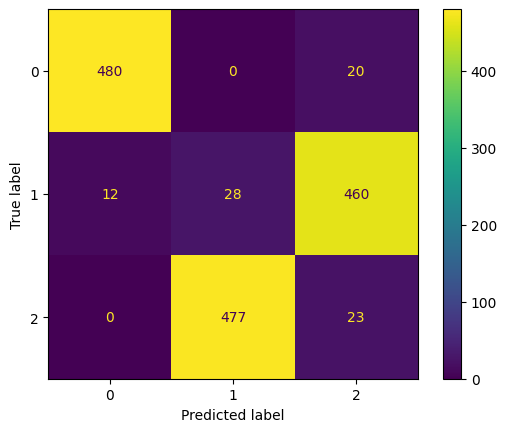

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, cluster_assignments)

## Compare k-Means Versions
Let's compare k-means++ to the k-means without sophisticated init

In [85]:
kmeans_random = KMeans(
    n_clusters=3, 
    random_state=random_state, 
    n_init=20, 
    init='random',  # the only difference: Random initialization instead of k-means++
    max_iter=300, tol=0.0001)

In [86]:
start_time=time.time()
cluster_assignments=kmeans_random.fit_predict(X)
print(time.time()-start_time)

0.1845533847808838


In [87]:
print(f'k-means has seen {kmeans_random.n_features_in_} features,\n \
used {kmeans_random.n_iter_} iterations, and \n \
resulted in an inertia (TDˆ2) of {kmeans_random.inertia_}.')

k-means has seen 2 features,
 used 9 iterations, and 
 resulted in an inertia (TDˆ2) of 2646.961150684696.


In [88]:
kmeans_random.cluster_centers_

array([[-4.5252317 , -2.77316921],
       [-2.29218231, -0.06091102],
       [ 0.96346817,  0.1769168 ]])

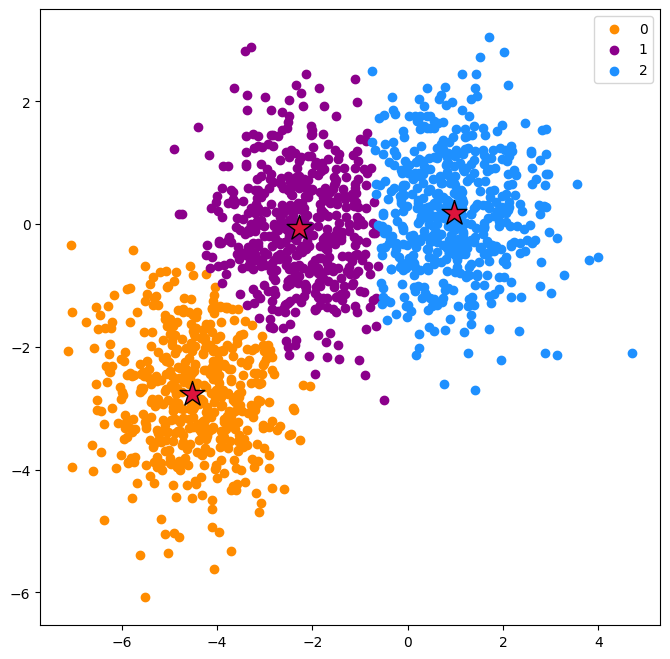

In [89]:
print_clustering(X, kmeans_random, cluster_assignments)

Observation: The clustering looks similar, the colors are different. Why?

The initial clusterings are determined at random. Thus the cluster indexes (0,1,2) are also randomly distributed.

## Alternative (sometimes faster) Version
MiniBatchKMeans - instead of centroid updates after each sample, centroids are updated after a batch of samples.

In [90]:
mbk=MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=100, batch_size=100, random_state=1, n_init=20)

In [91]:
start_time=time.time()
cluster_assignments=mbk.fit_predict(X)
print(time.time()-start_time)

0.24351930618286133


In [92]:
mbk.get_params()

{'batch_size': 100,
 'compute_labels': True,
 'init': 'k-means++',
 'init_size': None,
 'max_iter': 100,
 'max_no_improvement': 10,
 'n_clusters': 3,
 'n_init': 20,
 'random_state': 1,
 'reassignment_ratio': 0.01,
 'tol': 0.0,
 'verbose': 0}

In [93]:
mbk.n_iter_

3

In [94]:
mbk.inertia_

2651.4621620876846

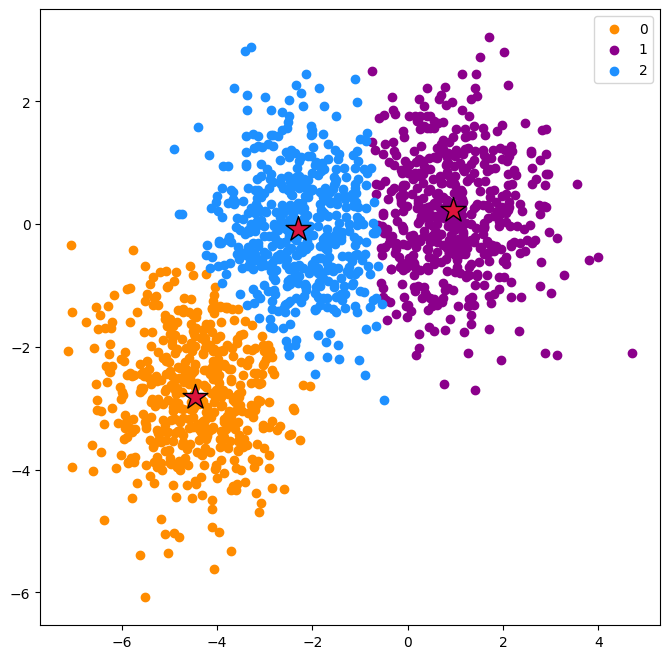

In [95]:
print_clustering(X, mbk, cluster_assignments)

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* In this notebook, we have tested different versions of k-means clusterings.
* The difference was mostly in terms of run time.
* Proper visualization is difficult, we were lucky that our data was two-dimensional.
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> 
In this notebook, the interpretation of the clusters is missing (makes little sense for artificial data).
</div>


<div class="alert alert-block alert-success">
<b>Play with:</b> 

* Create other datasets that are more or less easily separable.
* Try different $k$ -- as one would without previous knowledge on the expected number of groups.
* Load a real dataset and run $k$-means. Which difficulties do you observe?
</div>


# Short demo to explain the statement
X_sub=X[cluster_assignments==i, :]

In [29]:
X=np.array([[1,2],[3,4],[5,6],[7,8]])

In [30]:
X

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [31]:
cluster_assignments=np.array([0,1,0,2])

In [32]:
i=0
X_sub=X[cluster_assignments==i, :]

In [33]:
X_sub

array([[1, 2],
       [5, 6]])

In [34]:
X[1,:]

array([3, 4])

In [35]:
cluster_assignments==i

array([ True, False,  True, False])